In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import re

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
from nltk.stem import SnowballStemmer, PorterStemmer

In [6]:
from sklearn.decomposition import TruncatedSVD

In [7]:
from gensim import corpora, models, similarities, matutils

In [8]:
from gensim.parsing.preprocessing import preprocess_string, strip_punctuation,strip_numeric

In [9]:
import matplotlib.pyplot as plt

In [10]:
from sklearn.decomposition import NMF

#### EDA

In [11]:
submissions = pd.read_csv('submissions.csv', dtype = object)
comments = pd.read_csv('comments.csv', dtype = object)

In [12]:
submissions.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,author_flair_template_id,author_flair_text_color,media_metadata,poll_data,author_cakeday,distinguished,gallery_data,is_gallery,edited,banned_by
0,[],False,yashwardhanpatil,NaN,[],NaN,text,t2_hvrcxmdu,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,Gustavofring074,NaN,[],NaN,text,t2_hdo8on7l,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,Tarneks,NaN,[],NaN,text,t2_2sm7vahg,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,uanc,NaN,[],NaN,text,t2_v7nk1,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,nicbentulan,NaN,[],NaN,text,t2_7qp8wtjg,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
comments.head()

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,unrepliable_reason,awarders,retrieved_on,edited,author_cakeday
0,[],False,NaN,quantpsychguy,NaN,NaN,[],NaN,NaN,NaN,...,r/datascience,public,NaN,0,[],NaN,NaN,NaN,NaN,NaN
1,[],False,NaN,tea-and-shortbread,NaN,NaN,[],NaN,NaN,NaN,...,r/datascience,public,NaN,0,[],NaN,NaN,NaN,NaN,NaN
2,[],False,NaN,deepcontractor,NaN,NaN,[],NaN,NaN,NaN,...,r/datascience,public,NaN,0,[],NaN,NaN,NaN,NaN,NaN
3,[],False,NaN,sonicking12,NaN,NaN,[],NaN,NaN,NaN,...,r/datascience,public,NaN,0,[],NaN,NaN,NaN,NaN,NaN
4,[],False,NaN,Beny1995,NaN,NaN,[],NaN,NaN,NaN,...,r/datascience,public,NaN,0,[],NaN,NaN,NaN,NaN,NaN


In [14]:
submissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8715 entries, 0 to 8714
Data columns (total 86 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   all_awardings                  8715 non-null   object
 1   allow_live_comments            8715 non-null   object
 2   author                         8715 non-null   object
 3   author_flair_css_class         22 non-null     object
 4   author_flair_richtext          8701 non-null   object
 5   author_flair_text              60 non-null     object
 6   author_flair_type              8701 non-null   object
 7   author_fullname                8701 non-null   object
 8   author_is_blocked              8715 non-null   object
 9   author_patreon_flair           8701 non-null   object
 10  author_premium                 8701 non-null   object
 11  awarders                       8715 non-null   object
 12  can_mod_post                   8715 non-null   object
 13  con

In [15]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90409 entries, 0 to 90408
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   all_awardings                    90409 non-null  object
 1   archived                         81536 non-null  object
 2   associated_award                 1 non-null      object
 3   author                           90409 non-null  object
 4   author_flair_background_color    1015 non-null   object
 5   author_flair_css_class           1729 non-null   object
 6   author_flair_richtext            89434 non-null  object
 7   author_flair_template_id         1015 non-null   object
 8   author_flair_text                6724 non-null   object
 9   author_flair_text_color          7698 non-null   object
 10  author_flair_type                89434 non-null  object
 11  author_fullname                  89435 non-null  object
 12  author_patreon_flair            

In [16]:
submissions[submissions['subreddit']!='datascience']

#All submisssions are posted under r/datascience subreddit

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,author_flair_template_id,author_flair_text_color,media_metadata,poll_data,author_cakeday,distinguished,gallery_data,is_gallery,edited,banned_by


In [17]:
post_scores = submissions['score']

In [18]:
post_scores.unique()

array(['1', '0', '2', '29', '18', '6', '5', '3'], dtype=object)

In [19]:
com_scores = comments['score'].astype(float)

In [20]:
sorted(list(com_scores.unique()))

[-29.0,
 -26.0,
 -20.0,
 -16.0,
 -14.0,
 -13.0,
 -12.0,
 -11.0,
 -8.0,
 -7.0,
 -6.0,
 -5.0,
 -4.0,
 -3.0,
 -2.0,
 -1.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 36.0,
 37.0,
 39.0,
 40.0,
 41.0,
 43.0,
 44.0,
 46.0,
 47.0,
 50.0,
 53.0,
 56.0,
 57.0,
 60.0,
 61.0,
 62.0,
 66.0,
 69.0,
 70.0,
 73.0,
 75.0,
 79.0,
 80.0,
 85.0,
 88.0,
 89.0,
 93.0,
 96.0,
 98.0,
 102.0,
 109.0,
 110.0,
 118.0,
 122.0,
 129.0,
 135.0,
 145.0,
 147.0,
 247.0,
 337.0,
 nan,
 -92.0,
 -91.0,
 -53.0,
 -43.0,
 -37.0,
 -36.0,
 -35.0,
 -32.0,
 -25.0,
 -23.0,
 -22.0,
 -21.0,
 -19.0,
 -18.0,
 -17.0,
 -15.0,
 -10.0,
 -9.0,
 35.0,
 38.0,
 42.0,
 45.0,
 48.0,
 49.0,
 51.0,
 52.0,
 54.0,
 55.0,
 59.0,
 63.0,
 64.0,
 67.0,
 68.0,
 71.0,
 72.0,
 76.0,
 77.0,
 78.0,
 83.0,
 84.0,
 86.0,
 87.0,
 90.0,
 92.0,
 94.0,
 95.0,
 101.0,
 

In [21]:
com_scores.isna().sum() #We will just note the number of comments with null scores for now

4198

In [22]:
text_sub = submissions[['title','selftext']]
text_sub.head()

#Extracting title and body of posts 

,title,selftext
0,Latest Data Science Course by Top Data Science...,[removed]
1,Please explain to me the benefits of real time...,I am trying to make the argument to collect da...
2,Got my first offer,After 30 + rejections i got my first job as a ...
3,Large XML files from Oracle to CSV,We receive large XML files from an Oracle extr...
4,"Data science part of Max Deutsch: 1 - In 2017,...",NaN


In [23]:
text_sub.info() #Some posts only have a title but no body

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8715 entries, 0 to 8714
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     8715 non-null   object
 1   selftext  7148 non-null   object
dtypes: object(2)
memory usage: 136.3+ KB


In [24]:
no_body = text_sub[text_sub['selftext'].isna()].index #post indices with a title but no body
no_body

Int64Index([   4,   10,   41,   43,   45,   47,   51,   52,   54,   64,
            ...
            8668, 8676, 8678, 8682, 8685, 8687, 8694, 8700, 8701, 8703],
           dtype='int64', length=1567)

#### BUILD CORPUS

In [25]:
#post title and body only, comments under posts will be added later on...
corpus = []
for i in range(0,8715):
    if i in no_body:
        text = text_sub['title'][i]
    else:
        text = str(text_sub['title'][i]) + ' ' + str(text_sub['selftext'][i])
    corpus.append(text)
    text = '' 
    
print(f'\n 1st Post from r/datascience: \n \n {corpus[0]}')
print(f'\n 2nd Post from r/datascience: \n \n {corpus[1]}')
print(f'\n 3rd Post from r/datascience: \n \n {corpus[2]}')



 1st Post from r/datascience: 
 
 Latest Data Science Course by Top Data Science Experts [removed]

 2nd Post from r/datascience: 
 
 Please explain to me the benefits of real time data I am trying to make the argument to collect data on a month by month basis, as opposed to in a single 'block' of several months. This information is the number of people accessing a service. 

I would like to receive it month by month as I believe it would be more likely to be accurate and inform us better of what is happening, but I cannot articulate why. 

All I can find online is about the advantages of having this for sales data, but can you help me articulate why it is better for information about people?

Thanks

 3rd Post from r/datascience: 
 
 Got my first offer After 30 + rejections i got my first job as a data scientist. I got rejected from worse roles and yet it somehow worked out. Its honestly just luck.


In [26]:
print(f'\n 5th Post from r/datascience: \n \n {corpus[4]}') 
#let's check to see if NaN is removed


 5th Post from r/datascience: 
 
 Data science part of Max Deutsch: 1 - In 2017, chess n00b challenges world champion magnus carlsen and fails miserably. 2 - Few months later chess engine alphazero comes out. 3 - In 2022, data scientist points this out XD 4 - My lame joke: This n00b is the creator of alphazero.


In [27]:
corpus_com = comments['body']
corpus_com

0        But no one posts about how they can't do a Kag...
1        I'm a hiring manager not a recruiter. Recruite...
2        There are 5 ranks\n\nNovice -&gt; Contributer ...
3        May I DM you about it?  We are moving to Datab...
4        Probably as it shows no applied business exper...
                               ...                        
90404    That beyond a certain point model performance ...
90405    Putting "science" in the name does not make so...
90406    Even before I transitioned into DS / ML  - num...
90407    Combination of both. I do really like Plotly. ...
90408    Honestly as an interviewer, I love it when ent...
Name: body, Length: 90409, dtype: object

In [28]:
#adding comments to the corpus, we now have a fully built corpus

for comment in corpus_com:
    corpus.append(comment) 

In [29]:
print(f'\n 1st Text from corpus: \n \n {corpus[0]}')
print(f'\n 2nd Text from corpus: \n \n {corpus[1]}')
print(f'\n 3rd Text from corpus: \n \n {corpus[2]}')
print(f'\n 2nd to Last Text from corpus: \n \n {corpus[-3]}')
print(f'\n 1st to Last Text from corpus: \n \n {corpus[-2]}')
print(f'\n Last Text from corpus: \n \n {corpus[-1]}')

#examine corpus content


 1st Text from corpus: 
 
 Latest Data Science Course by Top Data Science Experts [removed]

 2nd Text from corpus: 
 
 Please explain to me the benefits of real time data I am trying to make the argument to collect data on a month by month basis, as opposed to in a single 'block' of several months. This information is the number of people accessing a service. 

I would like to receive it month by month as I believe it would be more likely to be accurate and inform us better of what is happening, but I cannot articulate why. 

All I can find online is about the advantages of having this for sales data, but can you help me articulate why it is better for information about people?

Thanks

 3rd Text from corpus: 
 
 Got my first offer After 30 + rejections i got my first job as a data scientist. I got rejected from worse roles and yet it somehow worked out. Its honestly just luck.

 2nd to Last Text from corpus: 
 
 Even before I transitioned into DS / ML  - numpy and pandas were the fi

#### CLEANING

In [30]:
#feature names in remove-list were obtained after first iteration of the doc-term matrix

remove_list = ['00','000','0000','00001','0001','001','006','00pm','01','018','02','025',
               '03','04','05','05001','06','07','08','09','0a','0aremindme','0s','10','100',
               '1000','10000','100000','1000000','1000s','1000x','1007','100gb','100k',
               '100s','100x','101','102','1024','103','104','105','105k','106','1080','1099',
               '10am','10b','10gb','10hrs','10ish','10k','10pm','10s','10tb','10th','10x',
               '10yrs','11','110','110k','111','112','114','115','115k','116','117','117k',
               '118','1186','11am','11th','12','120','1200','120k','123','1234','125','125k',
               '126','127','127k','128','12k','12th','13','130', '1300','130k','132','135',
               '135k','137','13k','14','140','1400','140k','144','145','145k','149','15',
               '150','1500','15000','150k','15k','15th','16','160','1600','160k','16gb',
               '16k','17','170','170k','175','175k','17c7d4bb354e','17th','18','180','1800',
               '180k','19','192','1920','1950','1980','1980s','1990','1995','1996','1999',
               '19th','1b','1d','1e','1gb','1h','1hr','1k','1m','1mm','1pm','1s','1st','1tb',
               '1y','1yr','20','200','2000','2000s','2001','2002','2003','2004','2005','2006',
               '2007','2008','2009','200k','200s','201','2010','2010s','2011','2012','2013',
               '2014','2015','2016','2017','2018','2019','2020','202021','202022','2021',
               '2022','2023','2024','2025','205926439','20a','20an','20analysis','20and',
               '20brackets','20comment','20data','20distribution','20entering','20feedback',
               '20gb','20here','20in','20inside','20is','20k','20local','20matter','20me',
               '20message','20nba','20of','20on','20or','20period','20players','20pls',
               '20point','20reminders','20s','20science','20scientist','20square','20th',
               '20the','20thread','20time','20to','20transitioning','20utc','20x','21','210',
               '210k','215k','21st','22','220','2201','220k','222','225','23','230','230k',
               '232','23k','24','240','240k','24719','24k','25','250','2500','250k','256',
               '25k','25m','25th','26','260','260k','26th','27','270','27k','28','28k','29',
               '2b','2c','2d','2f','2fcomments','2fdatascience''2fr','2fstalkme','2fwww',
               '2gb','2h','2k','2m','2nd','2pm','2tb','2u','2x','2y','30','300','3000',
               '300k','303','3060','30am','30k','30min','30pm','30s','30th','31','31k','32',
               '32gb','32k','33','34','35','350','3500','350k','35k','36','360','365','36k',
               '37','37k','38','38k39','3a','3a18','3a33''3a41','3a50','3aactivity','3ali',
               '3am','3blue1brown','3d','3f','3gpbcdc','3h','3k','3m','3nf','3pm','3rd','3x',
               '3y','3yrs','40','400','4000','400k','401k','40h','40hrs','40ish','40k','40s',
               '41','42','420''42k','43','44','45','450','45ish','45k','46','461','463','47',
               '475777','47k','48','48k','49','4gb','4k','4pm','4th','4x','50','500','5000',
               '500k','50gb','50k','50s','50th','51','512','52','53','533','538','54','55',
               '550','55k','56','5600x','57','58','59','5bhttps','5blink','5d','5k','5m',
               '5pm','5th','5x','5y','5yoe','5yr','5yrs5z8110','60','600','6000','600k',
               '60k','60s','61','62','63','64','64gb','65','650','65k','66','67','67k','68',
               '68k','69','6am','6k''6months','6pm','6th','6yrs','70','700','7000','700k',
               '70831894aef7''70k','71','72','72k','73','74','740','75','750','75k','76',
               '76k','77','77k','78','79','7am','7k','7pm','7th','7tt2','80','800','800k',
               '80k','80s','81','81qlp864','82','82739cbad35c409595876263cacde0e4','83','84',
               '84k','85','85k','86','87','88','89','8am','8gb','8h','8hrs','8k','8pm','8th',
               '90','900','90k','90s','90th','91','911','92','93','94','95','950','95k','96',
               '960','97','978','98','980','99','999','99999','9am','9k', '_1','_2', '_3',
               '___','____','[removed]', '+']

In [31]:
len(remove_list)

514

In [32]:
for i in range(len(corpus)):
    text_tokens = corpus[i].split()
    tokens_sw_removed = [word for word in text_tokens if not word in remove_list]
    corpus[i] = ' '.join(tokens_sw_removed)

In [33]:
print(f'\n 1st Text from corpus: \n \n {corpus[0]}')
print(f'\n 2nd Text from corpus: \n \n {corpus[1]}')
print(f'\n 3rd Text from corpus: \n \n {corpus[2]}')

# check to see if text in remove_list is removed


 1st Text from corpus: 
 
 Latest Data Science Course by Top Data Science Experts

 2nd Text from corpus: 
 
 Please explain to me the benefits of real time data I am trying to make the argument to collect data on a month by month basis, as opposed to in a single 'block' of several months. This information is the number of people accessing a service. I would like to receive it month by month as I believe it would be more likely to be accurate and inform us better of what is happening, but I cannot articulate why. All I can find online is about the advantages of having this for sales data, but can you help me articulate why it is better for information about people? Thanks

 3rd Text from corpus: 
 
 Got my first offer After rejections i got my first job as a data scientist. I got rejected from worse roles and yet it somehow worked out. Its honestly just luck.


In [34]:
for i in range(len(corpus)):
    corpus[i]=re.sub(r'\S*https?:\S*','',corpus[i])
#remove url links

In [35]:
for i in range(len(corpus)):
    corpus[i]=re.sub('[^A-Za-z0-9 ]+','',corpus[i])
#remove all characters other than alphanumericals and space 

In [36]:
print(f'\n 3rd Text from corpus: \n \n {corpus[14584]}')

#check to see if url and all characters other than alphanumericals and space were removed


 3rd Text from corpus: 
 
 Hi udataleaker I removed your submission for the following removal reasons  Not enough karma You dont have enough karma to start a new thread on rdatascience but you can post your questions in the Entering and Transitioning  until you accumulate at least karma Right now you only have karma


#### MODELING - LSA

In [37]:
stemmer = SnowballStemmer("english")

In [38]:
english_text = open('stop_words_english.txt', 'r')
stop_words_text= english_text.read()
stopwords = stop_words_text.split('\n')
print(stopwords)
english_text.close()

["'ll", "'tis", "'twas", "'ve", '10', '39', 'a', "a's", 'able', 'ableabout', 'about', 'above', 'abroad', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act', 'actually', 'ad', 'added', 'adj', 'adopted', 'ae', 'af', 'affected', 'affecting', 'affects', 'after', 'afterwards', 'ag', 'again', 'against', 'ago', 'ah', 'ahead', 'ai', "ain't", 'aint', 'al', 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'alongside', 'already', 'also', 'although', 'always', 'am', 'amid', 'amidst', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'announce', 'another', 'any', 'anybody', 'anyhow', 'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'ao', 'apart', 'apparently', 'appear', 'appreciate', 'appropriate', 'approximately', 'aq', 'ar', 'are', 'area', 'areas', 'aren', "aren't", 'arent', 'arise', 'around', 'arpa', 'as', 'aside', 'ask', 'asked', 'asking', 'asks', 'associated', 'at', 'au', 'auth', 'available', 'aw', 'away', 'awfully', 'az', 'b', 'ba', 'back', 'backed', 

In [39]:
stopwords.extend(['amp','lol','fuck','shit','shitty','evil','deleted'])


In [40]:
# This function is taken from Metis' Building an NLP Pipeline Notebook

def prep(word, stemmer=None):
        
    if word.lower() in stopwords:
        return None
    
    elif stemmer is None:
        return word.lower()
    
    else:
        return stemmer.stem(word)

In [41]:
#TF-IDF Vectorizer
#Decided against stemming
#Tried and decided against 2-gram tokenizing

cv_tfidf = TfidfVectorizer(preprocessor= None, stop_words = stopwords,
                           token_pattern='\\b[a-z][a-z]+\\b', ngram_range= (1, 1),
                           min_df = 0.0001, dtype= np.float32)

In [42]:
doc_term = cv_tfidf.fit_transform(corpus).toarray() #document-term matrix

/home/dyedbird/anaconda3/envs/unsupervised/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'daren', 'hadn', 'herse', 'himse', 'itse', 'mayn', 'mightn', 'mon', 'mustn', 'myse', 'needn', 'oughtn', 'shan'] not in stop_words.
  warnings.warn(


In [43]:
doc_term.shape

#10,019 features!

(99124, 10019)

In [44]:
# This string of code is taken from Metis' Building an NLP Pipeline Notebook
i =30500

doc = pd.Series(name=corpus[i],
                data=doc_term[i], 
                index=cv_tfidf.get_feature_names_out()) \
        .sort_values(ascending=False)

doc.head()

infuriating    0.411747
born           0.360320
geopandas      0.359460
install        0.308532
frustrating    0.300134
Name: No one is so smart that they were born knowing how to install geopandas Thats the definition of a learned skill The first time any of us ran into this type of problem it was frustrating and infuriating It doesnt say anything about you thats just how it goes, dtype: float32

In [45]:
lsa = TruncatedSVD(n_components = 10, random_state = 42) #instantiate model for 10 topics

In [46]:
lsa.fit_transform(doc_term) #fit model

array([[ 0.01394792,  0.00920121,  0.521128  , ..., -0.09415945,
         0.11958628,  0.0552744 ],
       [ 0.00500682,  0.00358735,  0.16737795, ..., -0.02782907,
         0.09463174, -0.00393469],
       [ 0.00511949,  0.00395208,  0.191718  , ..., -0.00360352,
        -0.03511748,  0.01677095],
       ...,
       [ 0.20404395,  0.00059922,  0.03811811, ...,  0.15189336,
        -0.03552197,  0.04868006],
       [ 0.00426875,  0.00219447,  0.08413363, ..., -0.02256244,
        -0.01967872,  0.00880847],
       [ 0.00386082,  0.00241447,  0.10150579, ..., -0.01009983,
        -0.00871905,  0.00378931]], dtype=float32)

In [47]:
cv_tfidf.get_feature_names_out()

array(['aa', 'ab', 'abandon', ..., 'zoom', 'zscore', 'zscores'],
      dtype=object)

In [48]:
# This string of code is taken from Metis' Topic_Modeling_LSA_NMF Notebook

topic_word = pd.DataFrame(lsa.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5",
                     "component_6","component_7","component_8","component_9","component_10"],
             columns = cv_tfidf.get_feature_names_out())
topic_word

,aa,ab,abandon,abandoned,abc,abilities,ability,abnormal,absence,absent,...,yup,zeros,zillow,zillows,zip,zone,zones,zoom,zscore,zscores
component_1,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,...,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0
component_2,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,...,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0
component_3,0.0,0.006,0.0,0.0,0.000,0.002,0.009,0.0,0.001,0.0,...,0.002,0.000,0.001,0.0,0.001,0.001,0.000,0.001,0.000,0.0
component_4,0.0,0.004,0.0,0.0,0.000,0.002,0.007,0.0,0.000,0.0,...,0.002,0.000,0.001,-0.0,0.000,0.001,0.001,0.001,0.000,0.0
component_5,-0.0,-0.005,-0.0,-0.0,-0.000,-0.002,-0.008,-0.0,-0.000,-0.0,...,-0.001,-0.000,-0.001,0.0,-0.000,-0.002,-0.001,-0.001,-0.000,-0.0
component_6,0.0,-0.007,-0.0,-0.0,-0.001,-0.001,-0.007,-0.0,0.000,-0.0,...,-0.002,-0.001,-0.001,-0.0,-0.003,-0.001,-0.001,-0.001,-0.001,-0.0
component_7,-0.0,-0.002,-0.0,-0.0,-0.000,-0.000,-0.004,0.0,-0.001,-0.0,...,-0.000,0.000,-0.001,-0.0,-0.000,-0.001,-0.000,0.000,-0.000,-0.0
component_8,-0.0,0.002,-0.0,-0.0,0.000,-0.000,-0.001,-0.0,0.000,-0.0,...,-0.001,-0.000,0.001,0.0,-0.001,-0.001,-0.001,-0.001,-0.000,-0.0
component_9,-0.0,-0.002,0.0,-0.0,-0.000,0.002,0.000,-0.0,-0.000,0.0,...,0.002,-0.000,0.001,-0.0,-0.000,0.002,0.002,0.001,0.000,-0.0
component_10,0.0,0.000,-0.0,-0.0,0.000,-0.002,-0.007,0.0,-0.000,0.0,...,-0.000,0.000,0.002,0.0,0.000,0.003,0.002,-0.000,0.000,-0.0


In [49]:
# This function code is taken from Metis' Topic_Modeling_LSA_NMF Notebook

def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [50]:
display_topics(lsa, cv_tfidf.get_feature_names_out(), 10)


Topic  0
python, data, sql, science, learn, learning, job, code, ds, time

Topic  1
karma, entering, transitioning, thread, rdatascience, submission, removed, accumulate, removal, reasons

Topic  2
data, science, job, scientist, ds, experience, people, time, analyst, company

Topic  3
comment, feel, resubmit, replies, received, created, job, ds, thread, transitioning

Topic  4
data, resubmit, replies, comment, received, created, science, feel, thread, transitioning

Topic  5
science, job, masters, ds, degree, experience, program, career, phd, field

Topic  6
job, scientist, data, analyst, company, title, scientists, engineer, role, companies

Topic  7
ds, scientist, role, data, analyst, roles, companies, engineer, company, swe

Topic  8
people, company, science, companies, team, tech, time, pay, money, hiring

Topic  9
time, ds, model, job, series, science, spend, data, models, hours


In [79]:
top_list = ['DS Fundamentals', 'Post Removal','Entry / Transitioning', 'Weekly Thread',\
            'Weekly Thread', 'Higher Education','Entry / Transitioning', \
            'Entry / Transitioning','Career', 'Modeling']

In [86]:
# This function code is taken from scikit-learn.org's Topic Extraction w/NMF and LDA Example

def plot_top_words(model, feature_names, n_top_words, top_list):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"{top_list[topic_idx]}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        #fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.savefig('model.jpg', bbox_inches = 'tight')

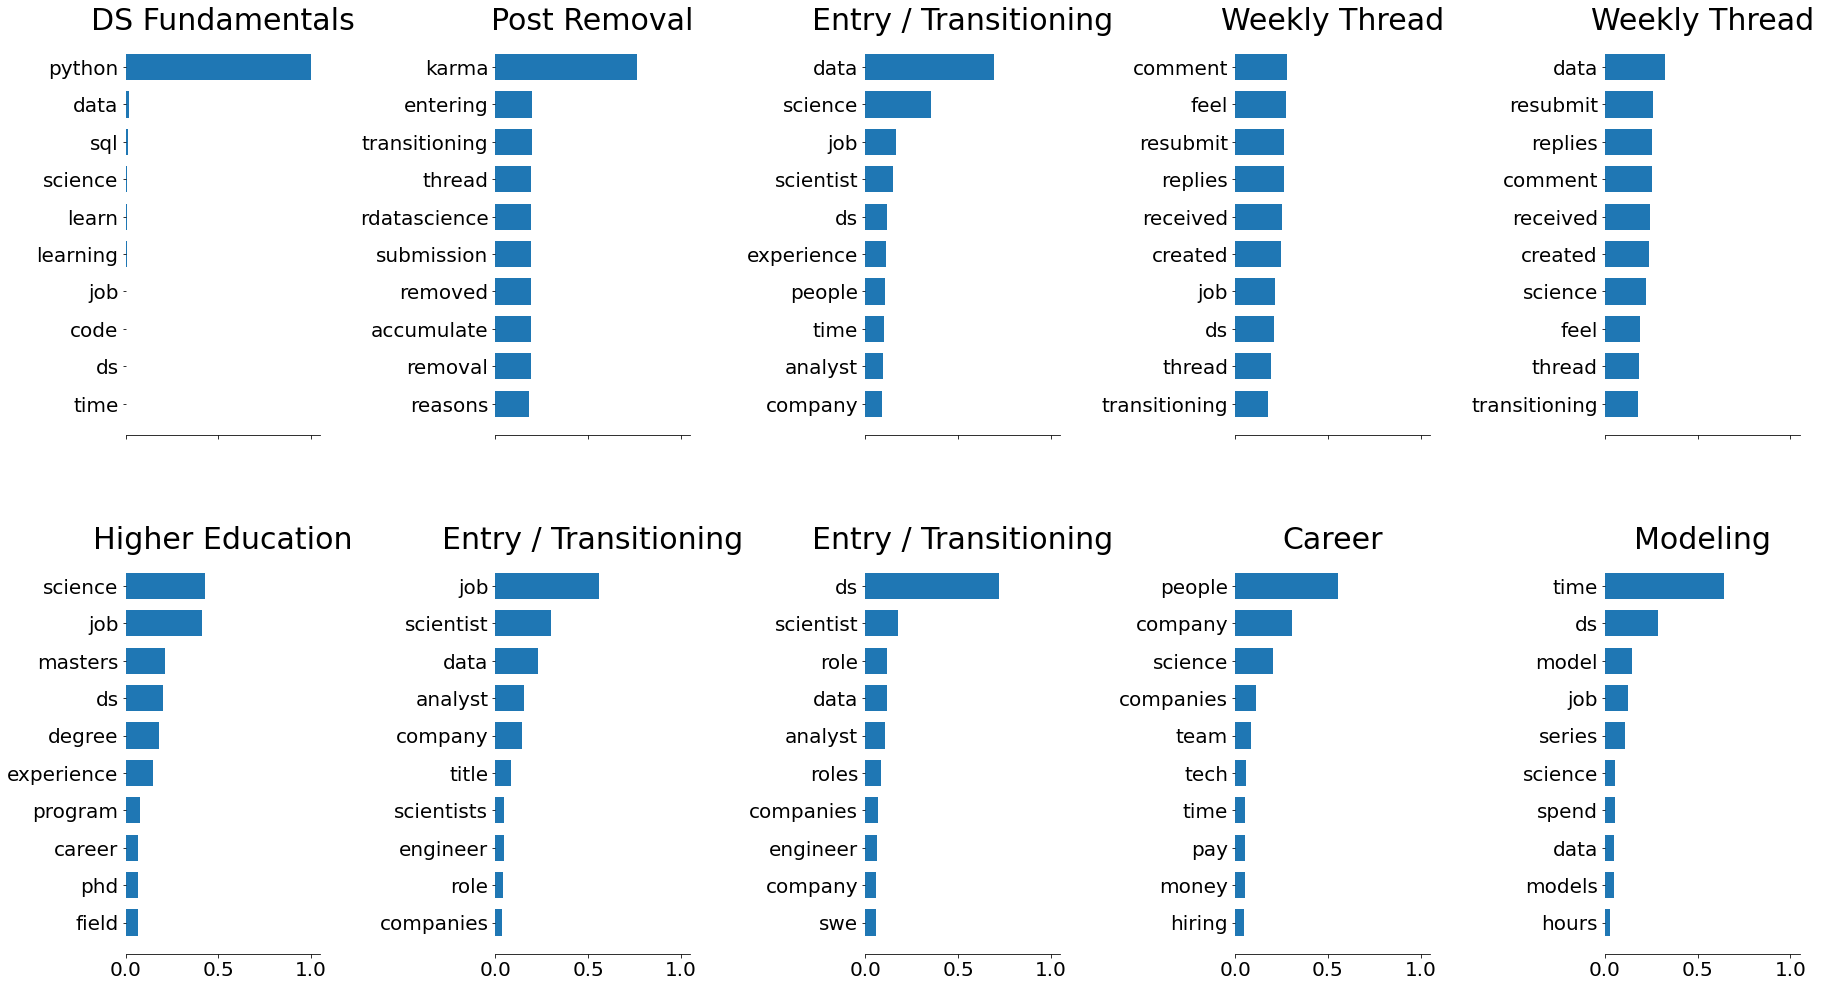

In [87]:
plot_top_words(lsa,cv_tfidf.get_feature_names_out(), 10, top_list)

#### MODELING - NMF

In [53]:
#instantiate model for 10 topics
nmf_model = NMF(n_components = 10, init = 'nndsvdar', max_iter = 200, random_state = 42) 

In [54]:
doc_topic = nmf_model.fit_transform(doc_term)

In [55]:
# This string of code is taken from Metis' Topic_Modeling_LSA_NMF Notebook

topic_word_nmf = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5",
                     "component_6","component_7","component_8","component_9","component_10"],
             columns = cv_tfidf.get_feature_names_out())
topic_word_nmf

,aa,ab,abandon,abandoned,abc,abilities,ability,abnormal,absence,absent,...,yup,zeros,zillow,zillows,zip,zone,zones,zoom,zscore,zscores
component_1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_3,0.000,0.018,0.000,0.001,0.001,0.005,0.020,0.001,0.002,0.001,...,0.005,0.001,0.001,0.001,0.005,0.000,0.000,0.000,0.000,0.000
component_4,0.001,0.032,0.002,0.000,0.002,0.025,0.082,0.001,0.004,0.001,...,0.019,0.000,0.003,0.000,0.001,0.010,0.004,0.014,0.001,0.001
component_5,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,...,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_6,0.001,0.000,0.002,0.001,0.000,0.000,0.000,0.000,0.004,0.000,...,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_7,0.001,0.001,0.000,0.001,0.000,0.002,0.001,0.001,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000
component_8,0.001,0.014,0.000,0.000,0.001,0.001,0.006,0.000,0.002,0.000,...,0.000,0.000,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_9,0.000,0.019,0.000,0.001,0.001,0.004,0.034,0.000,0.001,0.000,...,0.004,0.000,0.000,0.000,0.003,0.000,0.000,0.001,0.000,0.002
component_10,0.001,0.023,0.001,0.001,0.002,0.003,0.016,0.001,0.001,0.002,...,0.007,0.002,0.007,0.001,0.009,0.014,0.014,0.005,0.003,0.001


In [56]:
display_topics(nmf_model, cv_tfidf.get_feature_names_out(), 10)


Topic  0
python, sql, pandas, libraries, language, sas, matlab, programming, excel, packages

Topic  1
karma, rdatascience, submission, accumulate, removal, removed, entering, reasons, transitioning, thread

Topic  2
data, scientist, analyst, scientists, engineer, analysis, engineering, analytics, business, role

Topic  3
people, company, experience, lot, companies, interview, team, tech, resume, business

Topic  4
comment, resubmit, replies, received, created, feel, thread, transitioning, entering, weekly

Topic  5
science, data, masters, degree, career, program, statistics, field, courses, university

Topic  6
job, jobs, title, analyst, resume, degree, market, search, current, land

Topic  7
ds, masters, role, degree, roles, swe, stats, engineering, phd, mle

Topic  8
learning, sql, learn, machine, code, math, statistics, skills, deep, excel

Topic  9
time, model, models, series, regression, spend, day, project, hours, code


In [82]:
top_list_nmf = ['DS Fundamentals', 'Post Removal','Entry / Transitioning', 'Career',\
            'Weekly Thread', 'Higher Education','Entry / Transitioning', \
            'Entry / Transitioning','DS Fundamentals', 'Modeling']

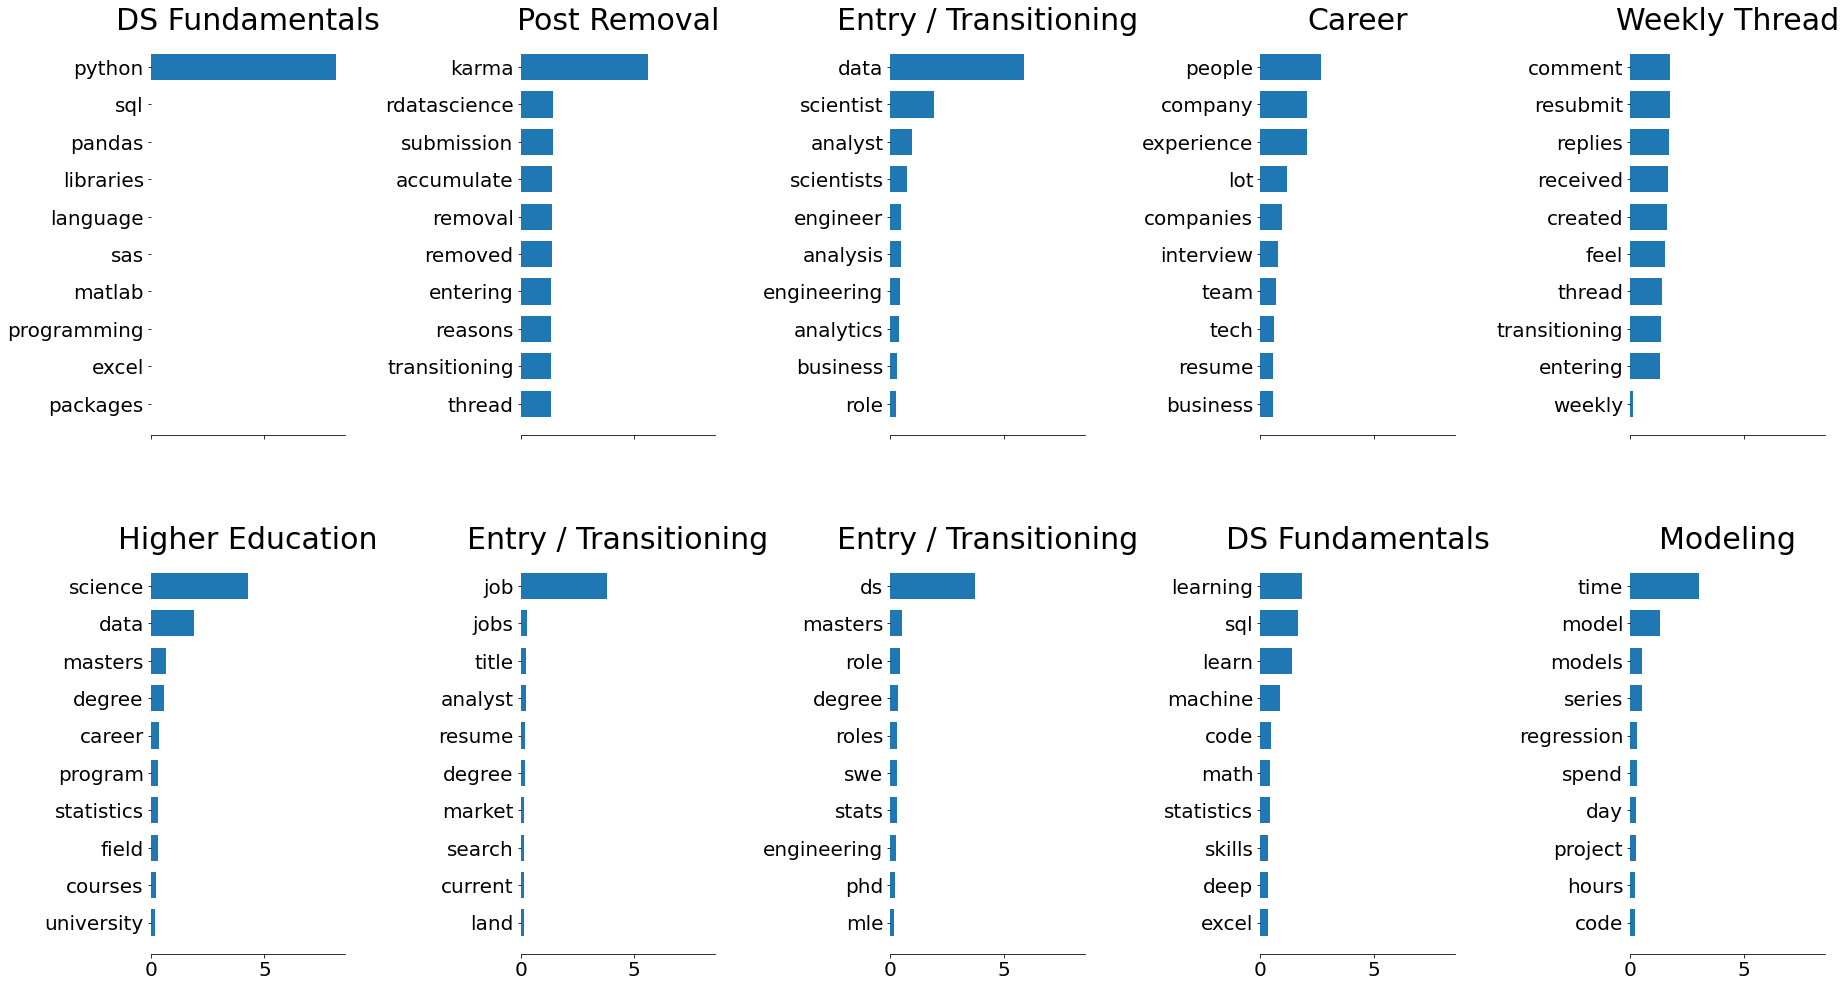

In [88]:
plot_top_words(nmf_model,cv_tfidf.get_feature_names_out(), 10,top_list_nmf )

#### MODELING - LDA

In [58]:
doc_word_trans = cv_tfidf.transform(corpus).transpose() #transpose doc-term matrix

In [59]:
# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(doc_word_trans)

In [60]:
id2word = dict((v, k) for k, v in cv_tfidf.vocabulary_.items()) # map row ids to words

In [61]:
lda = models.LdaModel(corpus=corpus, num_topics=10, id2word=id2word, passes=5, 
                                                                      per_word_topics = True)

In [62]:
lda.print_topics()

[(0,
  '0.015*"agree" + 0.007*"guess" + 0.007*"raise" + 0.007*"bad" + 0.007*"tree" + 0.007*"describing" + 0.007*"sell" + 0.007*"amazon" + 0.006*"decisions" + 0.006*"facebook"'),
 (1,
  '0.172*"karma" + 0.061*"thread" + 0.059*"transitioning" + 0.057*"entering" + 0.051*"post" + 0.045*"rdatascience" + 0.045*"reasons" + 0.043*"accumulate" + 0.041*"questions" + 0.039*"start"'),
 (2,
  '0.076*"removed" + 0.074*"submission" + 0.072*"removal" + 0.035*"op" + 0.015*"algebra" + 0.013*"agreed" + 0.010*"linear" + 0.009*"confidence" + 0.009*"bsc" + 0.009*"calc"'),
 (3,
  '0.019*"data" + 0.010*"science" + 0.010*"job" + 0.008*"ds" + 0.008*"people" + 0.007*"experience" + 0.006*"time" + 0.006*"company" + 0.005*"scientist" + 0.005*"lot"'),
 (4,
  '0.016*"book" + 0.011*"luck" + 0.011*"causal" + 0.011*"bayesian" + 0.009*"learning" + 0.009*"da" + 0.009*"math" + 0.009*"statistics" + 0.009*"sounds" + 0.008*"distribution"'),
 (5,
  '0.058*"python" + 0.023*"haha" + 0.020*"lmao" + 0.018*"congrats" + 0.018*"sas" 

In [63]:
lda_topics = lda.show_topics()
lda_topics

[(0,
  '0.015*"agree" + 0.007*"guess" + 0.007*"raise" + 0.007*"bad" + 0.007*"tree" + 0.007*"describing" + 0.007*"sell" + 0.007*"amazon" + 0.006*"decisions" + 0.006*"facebook"'),
 (1,
  '0.172*"karma" + 0.061*"thread" + 0.059*"transitioning" + 0.057*"entering" + 0.051*"post" + 0.045*"rdatascience" + 0.045*"reasons" + 0.043*"accumulate" + 0.041*"questions" + 0.039*"start"'),
 (2,
  '0.076*"removed" + 0.074*"submission" + 0.072*"removal" + 0.035*"op" + 0.015*"algebra" + 0.013*"agreed" + 0.010*"linear" + 0.009*"confidence" + 0.009*"bsc" + 0.009*"calc"'),
 (3,
  '0.019*"data" + 0.010*"science" + 0.010*"job" + 0.008*"ds" + 0.008*"people" + 0.007*"experience" + 0.006*"time" + 0.006*"company" + 0.005*"scientist" + 0.005*"lot"'),
 (4,
  '0.016*"book" + 0.011*"luck" + 0.011*"causal" + 0.011*"bayesian" + 0.009*"learning" + 0.009*"da" + 0.009*"math" + 0.009*"statistics" + 0.009*"sounds" + 0.008*"distribution"'),
 (5,
  '0.058*"python" + 0.023*"haha" + 0.020*"lmao" + 0.018*"congrats" + 0.018*"sas" 

In [64]:
topic_list = []
filters = [lambda x: x,strip_punctuation, strip_numeric]

for topic in lda_topics:
    topic_list.append(preprocess_string(topic[1], filters))

for item in topic_list:
    item = item.reverse()

In [65]:
prob_list = []
for i in range(0,10):
     prob_list.append(re.findall("\d+\.\d+",lda_topics[i][1]))

for item in prob_list:
    item = item.reverse()

In [71]:
prob_list = np.array(prob_list).astype(float)

In [95]:
top_list_lda = ['Big Tech?', 'Post Removal','Weekly Thread', 'Career',\
            'Learning', 'Entry / Transitioning','Advice', \
            'Higher Education','DS Tools', 'Modeling']

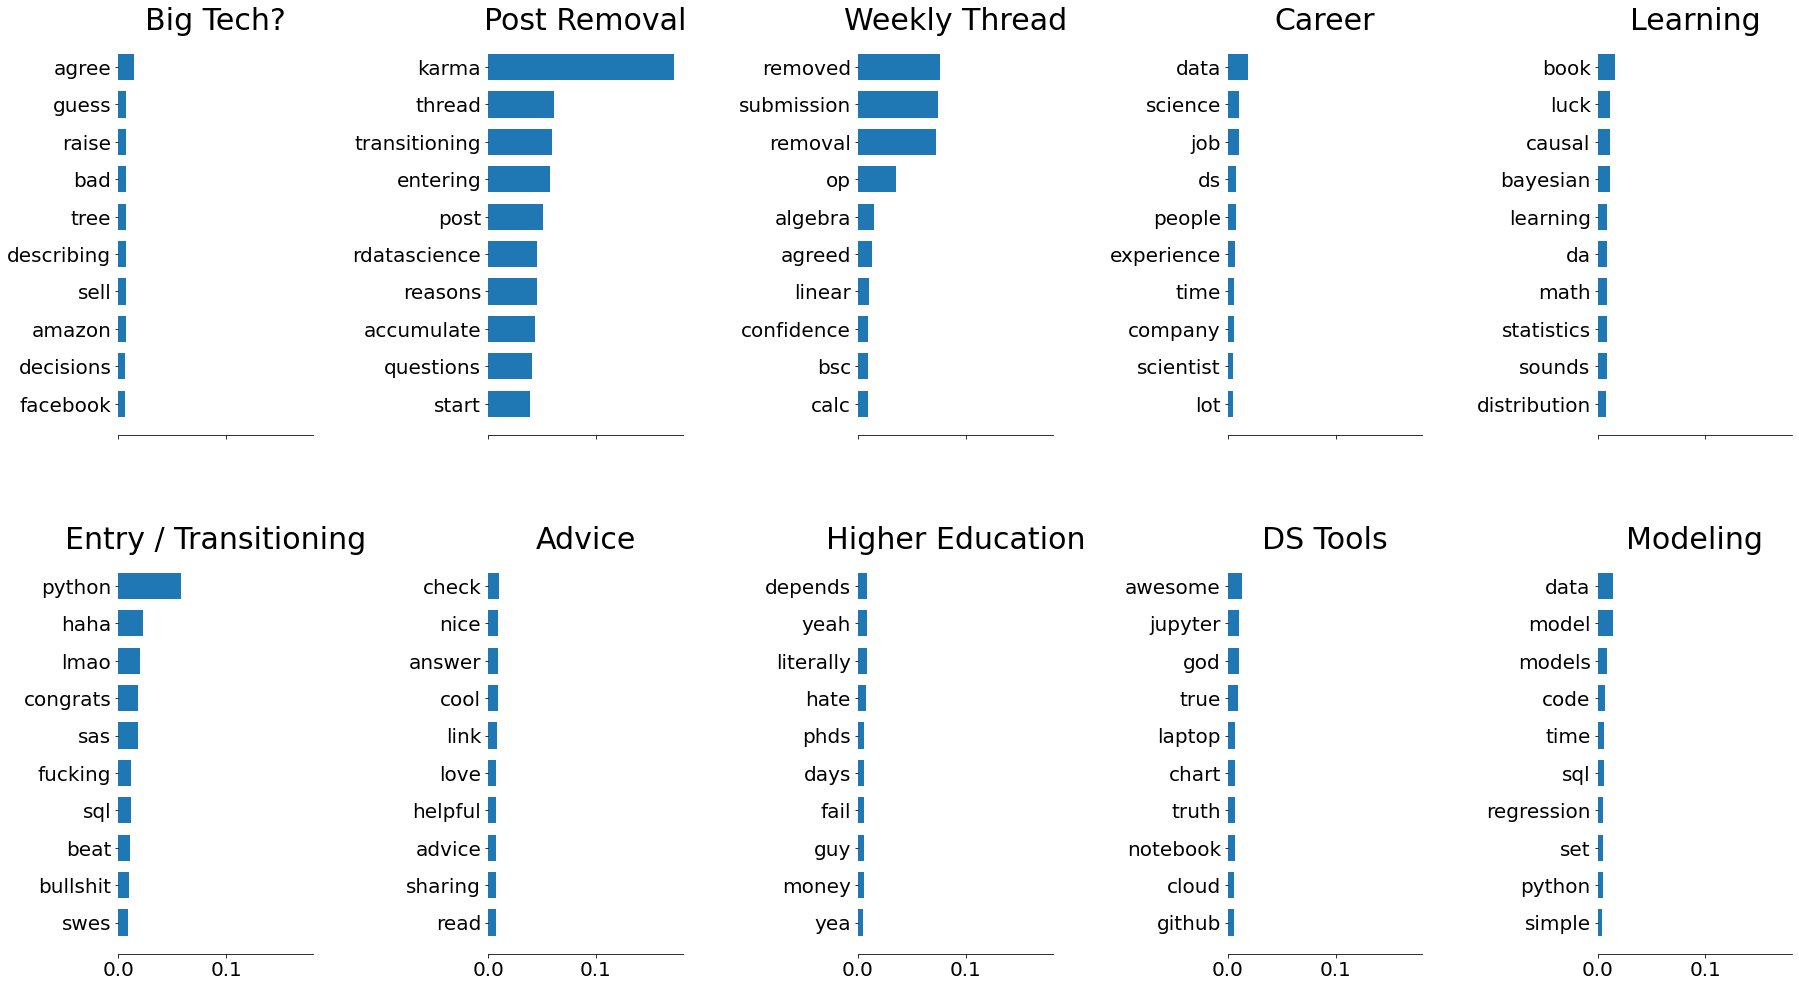

In [96]:
fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
axes = axes.flatten()
for i in range(0,10):
    ax = axes[i]
    ax.barh(topic_list[i],prob_list[i], height=0.7)
    ax.set_title(f"{top_list_lda[i]}", fontdict={"fontsize": 30})
    #ax.invert_yaxis()
    ax.tick_params(axis="both", which="major", labelsize=20)
    for i in "top right left".split():
        ax.spines[i].set_visible(False)
    #fig.suptitle(title, fontsize=40)

plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
plt.savefig('model.jpg', bbox_inches = 'tight')